In [122]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

In [123]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [124]:
with open('qna_data.json', 'r') as file:
    data = json.load(file)['questions_and_answers']

In [125]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [126]:
questions = [item['question'] for item in data]
preprocessed_questions = [preprocess_text(q) for q in questions]

In [127]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_questions)

In [128]:
wcss = []
max_clusters = 15 

In [129]:
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

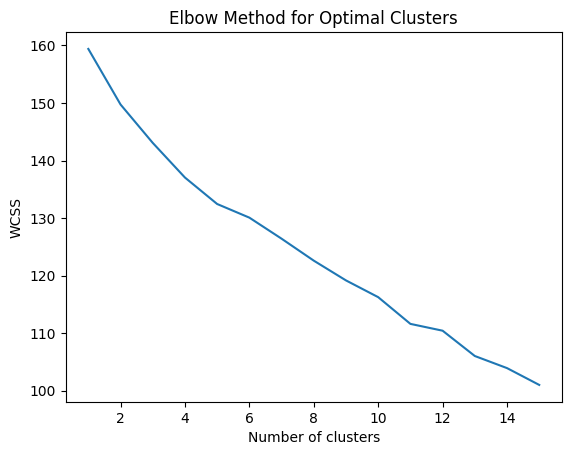

In [130]:
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [131]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_labels_map = {
    0: "credit hours",
    1: "general",
    2: "residential college",
    3: "registration",
    4: "class"
}

In [132]:
# Ensure that questions and cluster_labels have the same length
assert len(questions) == len(cluster_labels), "Questions and cluster labels must have the same length."

# Create a DataFrame with questions and their assigned labels
data = {
    "Question": questions,
    "Label": [cluster_labels_map[label] for label in cluster_labels]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('labelled_questions.csv', index=False)

# Print the DataFrame to verify
print(df)

                                              Question         Label
0                       How do I register for classes?         class
1                        Where is the library located?       general
2                 What are the registration deadlines?  registration
3           Does UM provide free shuttle bus services?       general
4    I get KK1, where should I assemble during regi...  registration
..                                                 ...           ...
165    Am I allowed to bring my own vehicle to campus?       general
166  How can I check the classes available for regi...         class
167     How can I be sure my registration is complete?  registration
168  What's the most number of credit hours I can t...  credit hours
169  What's the least number of credit hours I need...  credit hours

[170 rows x 2 columns]
